# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

Saving log normailizing example for reference
eCommerceDF['logarithm_base2'] = np.log2(eCommerceDF['ProductRelated'])
eCommerceDF['logarithm_base2'].hist()

#### Importing libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

#### Importing CSV Dataset from E-Commerce

In [50]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

In [51]:
eCommerceDF.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.094514
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492422
SpecialDay                -0.082305
OperatingSystems          -0.014012
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [52]:
eCommerceDF.shape

(12330, 18)

### Removing duplicates from the data

In [53]:
eCommerceDF = eCommerceDF.drop_duplicates()

In [54]:
eCommerceDF.shape

(12209, 18)

### Filling Page Values based on Revenue --> Saw if Revenue is False Page Values had a value of 0

In [56]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = 0

### Filling Revenue based on previous logic --> If PageValues = 0 then Revenue = False

In [57]:
eCommerceDF.loc[eCommerceDF['PageValues']!=0&eCommerceDF['Revenue'].eq(False),'Revenue'] = True

In [58]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600493,0.373009,0.254846,0.428396,0.371237,-0.213442,-0.311419,0.097417,-0.096870,-0.005337,-0.025537,-0.007078,-0.034520,0.023949,0.341764
Administrative_Duration,0.600493,1.000000,0.301845,0.237237,0.286935,0.353643,-0.137153,-0.202092,0.066621,-0.074615,-0.006583,-0.015687,-0.006609,-0.014911,0.013342,0.215851
Informational,0.373009,0.301845,1.000000,0.618599,0.371334,0.384959,-0.108863,-0.158998,0.047088,-0.049473,-0.008812,-0.037830,-0.029978,-0.034458,0.032945,0.219442
Informational_Duration,0.254846,0.237237,0.618599,1.000000,0.279114,0.346621,-0.070017,-0.102930,0.029931,-0.031236,-0.010230,-0.019543,-0.027824,-0.025083,0.023237,0.157555
ProductRelated,0.428396,0.286935,0.371334,0.279114,1.000000,0.860349,-0.193276,-0.286290,0.054859,-0.025766,0.004743,-0.013504,-0.039920,-0.044099,0.013602,0.306388
ProductRelated_Duration,0.371237,0.353643,0.384959,0.346621,0.860349,1.000000,-0.174186,-0.245483,0.051277,-0.038055,0.003867,-0.007650,-0.034700,-0.037279,0.005016,0.282378
BounceRates,-0.213442,-0.137153,-0.108863,-0.070017,-0.193276,-0.174186,1.000000,0.902538,-0.115421,0.087994,0.025934,-0.015922,0.001752,0.088280,-0.035434,-0.184240
ExitRates,-0.311419,-0.202092,-0.158998,-0.102930,-0.286290,-0.245483,0.902538,1.000000,-0.173206,0.116600,0.015798,-0.003716,-0.001874,0.086725,-0.053577,-0.262224
PageValues,0.097417,0.066621,0.047088,0.029931,0.054859,0.051277,-0.115421,-0.173206,1.000000,-0.066073,0.019594,0.046020,0.010350,0.012953,0.010434,0.546952
SpecialDay,-0.096870,-0.074615,-0.049473,-0.031236,-0.025766,-0.038055,0.087994,0.116600,-0.066073,1.000000,0.013518,0.003564,-0.016367,0.052905,-0.017666,-0.084733


### Dropping Operating System Column not a good predictor variable for Revenue

In [59]:
eCommerceDF = eCommerceDF.drop('OperatingSystems',1)

In [60]:
eCommerceDF.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                  21
SpecialDay                   0
Month                        0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

### Filling Information with logic --> If user duration on an Informational Page is 0 then Informational has to be equal to 0 

In [61]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

In [62]:
eCommerceDF.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational              24
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                 21
SpecialDay                  0
Month                       0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [64]:
eCommerceDF.shape[0]

12209

### Dropped remaining values 45 total

In [65]:
eCommerceDF = eCommerceDF.dropna()

In [66]:
eCommerceDF.shape[0] 

12164

In [68]:
eCommerceDF.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### Updating data type for Informational to int 

In [69]:
eCommerceDF['Informational'] = eCommerceDF['Informational'].astype('int64')

### Dropping following columns due to low correlation in predicting Revenue

In [71]:
eCommerceDF = eCommerceDF.drop(columns=['Browser','Region','TrafficType'])

In [72]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [78]:
eCommerceDF.groupby(by="VisitorType").count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue
VisitorType,,,,,,,,,,,,,
New_Visitor,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690,1690
Other,81,81,81,81,81,81,81,81,81,81,81,81,81
Returning_Visitor,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393,10393


In [79]:
eCommerceDF.groupby(by=["VisitorType","Revenue"]).count()


Administrative  Administrative_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1220                     1220   
                  True                470                      470   
Other             False                63                       63   
                  True                 18                       18   
Returning_Visitor False              7826                     7826   
                  True               2567                     2567   

                           Informational  Informational_Duration  \
VisitorType       Revenue                                          
New_Visitor       False             1220                    1220   
                  True               470                     470   
Other             False               63                      63   
                  True                18                      18   
Returning_Visitor False             7826                    7826   
                  True              2567                    2567   

                           ProductRelated  ProductRelated_Duration  \
VisitorType       Revenue                                            
New_Visitor       False              1220                     1220   
                  True                470                      470   
Other             False                63                       63   
                  True                 18                       18   
Returning_Visitor False              7826                     7826   
                  True               2567                     2567   

                           BounceRates  ExitRates  PageValues  SpecialDay  \
VisitorType       Revenue                                                   
New_Visitor       False           1220       1220        1220        1220   
                  True             470        470         470         470   
Other             False             63         63          63          63   
                  True              18         18          18          18   
Returning_Visitor False           7826       7826        7826        7826   
                  True            2567       2567        2567        2567   

                           Month  Weekend  
VisitorType       Revenue                  
New_Visitor       False     1220     1220  
                  True       470      470  
Other             False       63       63  
                  True        18       18  
Returning_Visitor False     7826     7826  
                  True      2567     2567

In [80]:
eCommerceDF.groupby(by = "Revenue").mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend
Revenue,,,,,,,,,,,
False,1.674278,59.279889,0.342079,21.808975,24.075530,890.945726,0.025313,0.048604,0.000000,0.071753,0.228126
True,4.273650,147.106622,0.979705,72.139553,55.276268,2125.572116,0.006094,0.020691,23.544304,0.032209,0.251718


### November had the highest True Revenue Value ---> Prehaps strong purchasing for Black Friday Holiday?? --> Visulaize Special Day Revenue Count for month of November could be interesting

In [81]:
eCommerceDF.groupby(by = ["Month","Revenue"]).mean()

Administrative  Administrative_Duration  Informational  \
Month Revenue                                                           
Aug   False          2.634868                77.116076       0.450658   
      True           4.317829               176.475182       0.759690   
Dec   False          1.759036                64.558848       0.413404   
      True           3.838710               133.349723       0.865591   
Feb   False          0.377143                 9.192048       0.074286   
      True           5.666667               249.319445       0.500000   
Jul   False          1.695793                67.115788       0.362460   
      True           4.286885               109.302821       0.901639   
June  False          1.553571                36.705048       0.424107   
      True           4.983333               145.357197       1.083333   
Mar   False          1.503831                55.255074       0.280971   
      True           4.175862               164.287683       1.189655   
May   False          1.344801                49.722526       0.269811   
      True           4.227831               142.472252       0.978172   
Nov   False          1.660705                58.634096       0.406745   
      True           4.430556               152.434637       1.081349   
Oct   False          3.307692               114.312548       0.373626   
      True           4.562842               150.344194       0.715847   
Sep   False          3.010169                97.340476       0.474576   
      True           3.973684               133.186525       0.736842   

               Informational_Duration  ProductRelated  \
Month Revenue                                           
Aug   False                 25.900987       29.536184   
      True                  58.169147       58.813953   
Dec   False                 29.072540       23.762801   
      True                  69.018900       44.134409   
Feb   False                  1.822857       10.571429   
      True                  20.000000       34.166667   
Jul   False                 28.917152       29.265372   
      True                  87.641120       54.565574   
June  False                 17.152604       28.120536   
      True                  31.023444       67.266667   
Mar   False                 20.734607       16.633461   
      True                  87.195022       39.355172   
May   False                 15.242779       20.699652   
      True                  69.703683       48.111869   
Nov   False                 28.750721       32.311702   
      True                  71.268618       72.226190   
Oct   False                 17.251762       29.252747   
      True                  81.653011       42.393443   
Sep   False                 15.697853       27.444068   
      True                  74.823916       44.243421   

               ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Month Revenue                                                                
Aug   False                 964.290336     0.023255   0.045517    0.000000   
      True                 1999.339304     0.006325   0.019368   19.744339   
Dec   False                 930.995702     0.021719   0.044997    0.000000   
      True                 1793.197406     0.004633   0.019532   31.279080   
Feb   False                 451.513972     0.045686   0.073737    0.000000   
      True                 1275.291667     0.009471   0.023224   27.304457   
Jul   False                 951.417753     0.030839   0.053107    0.000000   
      True                 1895.535692     0.009214   0.025741   14.533661   
June  False                 932.531909     0.040357   0.065363    0.000000   
      True                 2324.616092     0.007566   0.025050   16.278911   
Mar   False                 670.918961     0.020125   0.045410    0.000000   
      True                 1677.169298     0.003799   0.017322   25.854150   
May   False                 737.809889     0.030529   0.05501

### Month is a good predictor for Revenue -->  November yields a higher chance of a purchase

Text(0, 0.5, 'Frequency of Purchase')

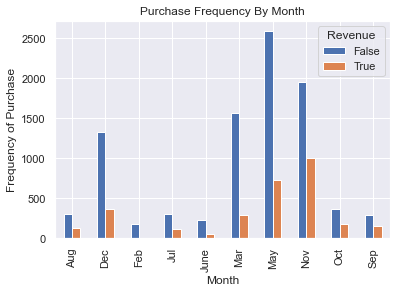

In [82]:
%matplotlib inline
pd.crosstab(eCommerceDF.Month,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

### Vistor Type May Not be a good predictor --> Seems like there is an equal ratio between New and Returning --> I could be wrong tho

Text(0, 0.5, 'Frequency of Purchase')

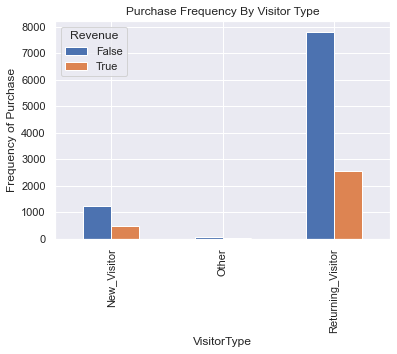

In [83]:
%matplotlib inline
pd.crosstab(eCommerceDF.VisitorType,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Visitor Type')
plt.xlabel('VisitorType')
plt.ylabel('Frequency of Purchase')

### Weekend may not be a good predictor --> for same reason stated above --> But i could be wrong again lol

Text(0, 0.5, 'Frequency of Purchase')

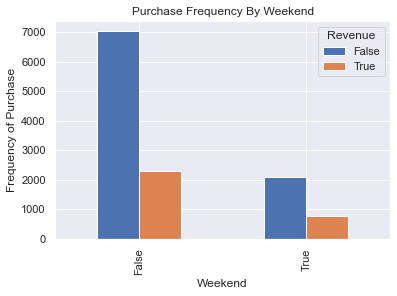

In [84]:
%matplotlib inline
pd.crosstab(eCommerceDF.Weekend,eCommerceDF.Revenue).plot(kind='bar')
plt.title('Purchase Frequency By Weekend')
plt.xlabel('Weekend')
plt.ylabel('Frequency of Purchase')

### I will be dropping vistor type and weekend as a result of the findings 

In [86]:
eCommerceDF = eCommerceDF.drop(columns=['Weekend','VisitorType'])

In [87]:
eCommerceDF.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Administrative,1.000000,0.599941,0.371767,0.251115,0.425811,0.368955,-0.213633,-0.311653,0.098142,-0.096774,0.339887
Administrative_Duration,0.599941,1.000000,0.301418,0.237039,0.286952,0.354772,-0.137057,-0.201879,0.066279,-0.074340,0.214997
Informational,0.371767,0.301418,1.000000,0.619476,0.368189,0.382606,-0.108619,-0.158440,0.047486,-0.048865,0.218070
Informational_Duration,0.251115,0.237039,0.619476,1.000000,0.276699,0.344812,-0.069535,-0.102118,0.029901,-0.031374,0.154887
ProductRelated,0.425811,0.286952,0.368189,0.276699,1.000000,0.859193,-0.193574,-0.286649,0.055084,-0.024782,0.304676
ProductRelated_Duration,0.368955,0.354772,0.382606,0.344812,0.859193,1.000000,-0.174373,-0.245666,0.051377,-0.037093,0.280170
BounceRates,-0.213633,-0.137057,-0.108619,-0.069535,-0.193574,-0.174373,1.000000,0.902557,-0.115401,0.088561,-0.183446
ExitRates,-0.311653,-0.201879,-0.158440,-0.102118,-0.286649,-0.245666,0.902557,1.000000,-0.173213,0.117187,-0.261418
PageValues,0.098142,0.066279,0.047486,0.029901,0.055084,0.051377,-0.115401,-0.173213,1.000000,-0.066031,0.547590
SpecialDay,-0.096774,-0.074340,-0.048865,-0.031374,-0.024782,-0.037093,0.088561,0.117187,-0.066031,1.000000,-0.086016


### Columns to keep for now

In [89]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Revenue'],
      dtype='object')

### Testing Log Regression